In [1]:
import numpy as np
data=np.genfromtxt('Outlier.txt',delimiter=',')
np.random.shuffle(data); # Since data given is sorted
Y=data[:,-1]
X=data[:,:-1]
#X=np.genfromtxt('X.csv',delimiter=',')
#Y=np.genfromtxt('y.csv',delimiter=',')
print("The labels are : "+str(np.unique(Y)))  
#np.random.shuffle((data['X']),(data['y']))

The labels are : [0. 1. 2. 3.]


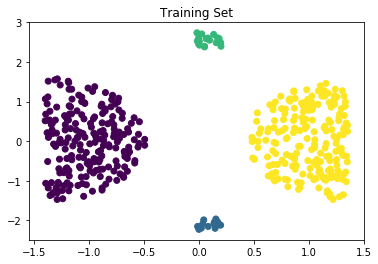

In [2]:
import numpy as np
import NNClassifier as NNC
def normalise(Xin):
        return (Xin-np.mean(Xin,axis=0))/np.std(Xin,axis=0)    # NORMALISING FEATURES

sz=X.shape[0]
X=normalise(X)   #normalising X
# separation of training set and test set
test_sz=sz//4  
tr_sz=sz-test_sz   
layer_sz=[25]
train=NNC.NNClassifier()
train.set(X[:tr_sz-1,:],Y[:tr_sz-1],layer_sz)
test=NNC.NNClassifier()
test.set(X[tr_sz:,:],Y[tr_sz:],layer_sz)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:tr_sz-1,0],X[:tr_sz-1,1],c=Y[:tr_sz-1])
plt.title('Training Set')
plt.show()

In [3]:
train.GradientDescent(LAMBDA=0,alpha=0.3,iter=200)
print("Accuracy on test set:  "+str(train.accuracy(test))+"%")

Accuracy on test set:  100.0%


In [4]:
print(train.predict(X[tr_sz:,:]))

[0 3 0 3 0 3 0 3 3 3 0 0 3 0 3 1 0 3 0 3 3 0 0 0 3 3 0 0 3 3 3 3 3 1 1 3 0
 0 0 3 0 3 3 3 2 3 0 3 0 3 3 2 3 0 3 3 3 0 0 3 3 3 0 3 2 0 0 0 3 3 0 0 1 3
 0 2 0 0 3 0 3 0 0 0 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 3 0 0 0 0 0 0 0 3 3 3 1
 3 3 0 0 3 1 3 0 0 3 3 2 3 0 1 3 0 0 0 3 0 0 3 3 0 0 3 3 0 0 0 0 0 3 3 3 1
 3 0]


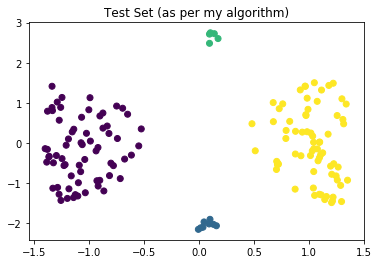

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=train.predict(X[tr_sz:,:]))
plt.title('Test Set (as per my algorithm)')
plt.show()

In [6]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(batch_size=tr_sz,hidden_layer_sizes=25)
clf.fit(X[:tr_sz-1,:],Y[:tr_sz-1])
prediction=clf.predict(X[tr_sz:,:])
acc=(sum(prediction==Y[tr_sz:])/test_sz)*100
print("Accuracy on test set (By sklearn) : "+str(acc)+"%")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Accuracy on test set (By sklearn) : 91.33333333333333%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


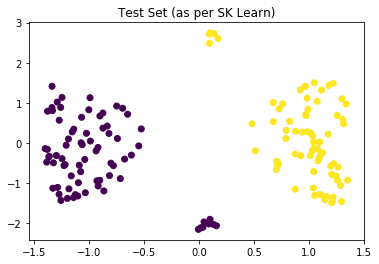

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[tr_sz:,0],X[tr_sz:,1],c=prediction)
plt.title('Test Set (as per SK Learn)')
plt.show()